Data Analytics Assignment - Loan Approval

Author: Vicente Alejandro Lomelín Ibarra  A01175933

April 2022

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Data Exploration

## Importing Datasets

In [2]:
df_loans = pd.read_csv('loan.csv')
df_predict = pd.read_csv('predict.csv')

## Data Undestanding

In [3]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df_loans.shape

(614, 13)

The data provided consists of a total of 13 attributes. Out of these attributes, 8 of them appear to be categorical types and 5 of them numeric. Out of the 8 categorical attributes, one of them (Loan_Status) is the target variable, leaving a total of 12 attributes that could potentially be used to build a model. The total number of entries of the data is 614, however there appears to be some data missing, since the total of entries some of the listed attributes appear to be less than 614 entries. The Loan_ID attribute serves as a unique identifier for each of the customers, therefore it can be later dropped since it would not provide additional information that could be used by the model, leaving a total of 11 possible attributes that could be used to build the model.

In [5]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
df_predict.shape

(367, 12)

The predict file appears to have 367 entries, with the same attributes as the loans file with the exception of the target variable of Loan_Status. The datatypes of the attributes are the same as those from the loans file. Additionally, similar to what is observed in the loans file, there appears to be some missing values in the file. Appropiate steps would be required to address this issue based on the steps taken for the loans historical data.

In [7]:
df_loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df_loans.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## Missing Values

In [9]:
df_loans = df_loans.replace(r'^\s*$', np.nan, regex = True)

In [10]:
# Missing Values
print('Total missing values: {}'.format(df_loans.isnull().sum().sum()))
df_loans.isnull().sum()

Total missing values: 149


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The loans.csv file presents a total of 149 missing values. The attributes that present these missing values are Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History. Due to the amount of missing values present in the data and the total number of samples, dropping them would mean a loss of a significant amount of data for the model, therefore alternative methods of imputations are to be considered. Before defining how to deal with the data, a exploration of these attributes would help determine which is the best approach to do this.

In [11]:
print('Total missing values: {}'.format(df_predict.isnull().sum().sum()))
df_predict.isnull().sum()

Total missing values: 84


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

We can observe that the predict file also present missing values in the same attributes as the loan.csv file. The imputation for this dataset will be performed considering the replacements chosen for the loans.csv data.

In [12]:
print('Unique Values: {}'.format(df_loans['Gender'].unique()))
df_loans['Gender'].describe()

Unique Values: ['Male' 'Female' nan]


count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

The attribute appears to be a binary categorical variable, with the Male gender having a higer frequency among the samples. Since there is no way to accurately define the gender for the missing values, the imputation for the missing values for this attribute will consider the value with the highest frequency.

In [13]:
print('Unique Values: {}'.format(df_loans['Married'].unique()))
df_loans['Married'].describe()

Unique Values: ['No' 'Yes' nan]


count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

The attribute appears to be a binary categorical variable, with the Yes value (Married) having a higer frequency among the samples. Since there is no way to accurately infer if the customer is married through the other attributes to replace the missing values, the imputation for the values will consider the value with the highest frequency.

In [14]:
print('Unique Values: {}'.format(df_loans['Dependents'].unique()))
df_loans['Dependents'].describe()

Unique Values: ['0' '1' '2' '3+' nan]


count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

The attribute appears to be a binary categorical variable, with 0 dependents having a higer frequency among the samples. Since there is no way to accurately infer the number of dependents thorugh the other attributes to replace the missing values, the imputation for the values will consider the value with the highest frequency. Additionally, the variable appears to be ordinal, where each value corresponds to the number of dependents the customer has. The datatype of this variable can be modified to be numerical.

In [15]:
print('Unique Values: {}'.format(df_loans['Self_Employed'].unique()))
df_loans['Self_Employed'].describe()

Unique Values: ['No' 'Yes' nan]


count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

The attribute appears to be a binary categorical variable, with the Yes value (Married) having a higer frequency among the samples. Since there is no way to accurately infer if the customer is married through the other attributes to replace the missing values, the imputation for the values will consider the value with the highest frequency.

In [16]:
print('Unique Values: {}'.format(df_loans['LoanAmount'].unique()))
df_loans['LoanAmount'].describe()

Unique Values: [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243.
  40. 250. 311. 400. 161. 196. 324. 157. 145. 181.  26. 211.  

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [17]:
print('Unique Values: {}'.format(df_loans['Loan_Amount_Term'].unique()))
df_loans['Loan_Amount_Term'].describe()

Unique Values: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [18]:
print('Unique Values: {}'.format(df_loans['Credit_History'].unique()))
df_loans['Credit_History'].describe()

Unique Values: [ 1.  0. nan]


count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

### Value imputation

For the value imputation of the binary attributes, the value with the highest frquency was taken into consideration to replace the values. In the case of Loan_Amount_Term, the median value of the attribute seems to be the most appropiate to replace the missing values. Finally, for the LoanAmount missing values, the mean value is considered to be the most appropiate to replace the missing values.

In [19]:
df_loans['Gender'].fillna('Male',inplace = True)
df_loans['Married'].fillna('Yes',inplace = True)
df_loans['Dependents'].fillna('0',inplace = True)
df_loans['Self_Employed'].fillna('No',inplace = True)
df_loans['LoanAmount'].fillna(df_loans['LoanAmount'].mean(),inplace = True)
df_loans['Loan_Amount_Term'].fillna(df_loans['Loan_Amount_Term'].median(),inplace = True)
df_loans['Credit_History'].fillna(1.0,inplace = True)

In [20]:
df_loans.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Attribute exploration

In [22]:
# Drop Loan_ID from the data
df_loans = df_loans.drop(['Loan_ID'], axis = 1)

### Numerical Attributes

According to what can be observed from the data, additionally to the 5 numeric variables, the Dependents variable appear to contain numeric values. The values from this attribute will be modified so that it takes a numeric datatype instead of a string. In the case of the value of '3+', the value will adopt the numeric value of 3.

In [23]:
num_attr = df_loans.select_dtypes(include = ['int64', 'float64'])

In [24]:
num_attr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [25]:
num_col = num_attr.columns
for col in num_col:
    print("{}'s number of unique values: {}".format(col,len(num_attr[col].unique())))

ApplicantIncome's number of unique values: 505
CoapplicantIncome's number of unique values: 287
LoanAmount's number of unique values: 204
Loan_Amount_Term's number of unique values: 10
Credit_History's number of unique values: 2


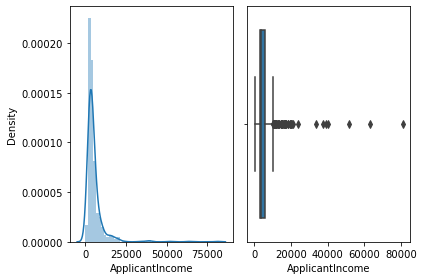

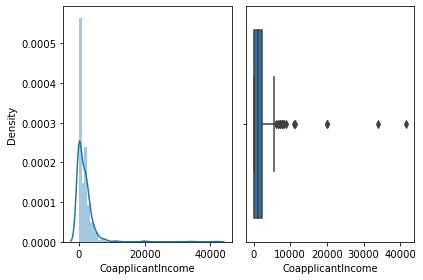

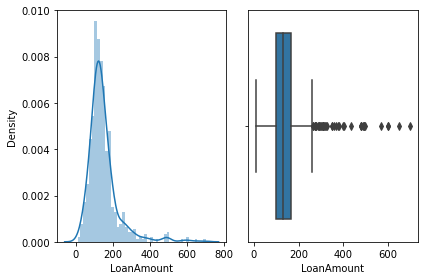

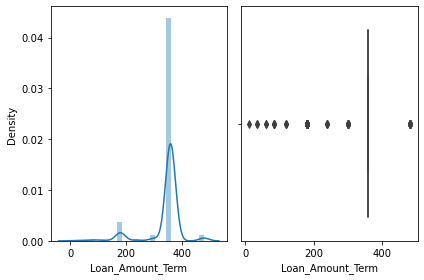

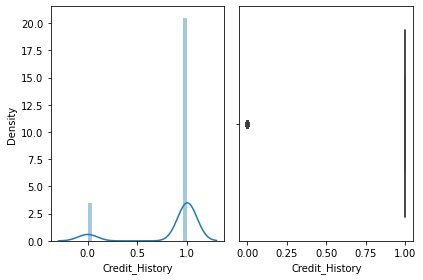

In [26]:
for col in num_col:
  fig, ax = plt.subplots(1,2, figsize = (6,4))
  sns.distplot(num_attr[col], ax = ax[0])
  sns.boxplot(num_attr[col])

  plt.tight_layout()

The attributes of ApplicantIncome, CoapplicantIncome and LoanAmount appear to have a normal distribution skewed to the left. On the other hand, the distribution of the Loan_Amount_Term appears to prevail the value of 360 months, and for Credit_History, most of the applicants appear to have good credit history.

### Categorical Attributes

In [27]:
obj_attr = list(df_loans.select_dtypes('object'))

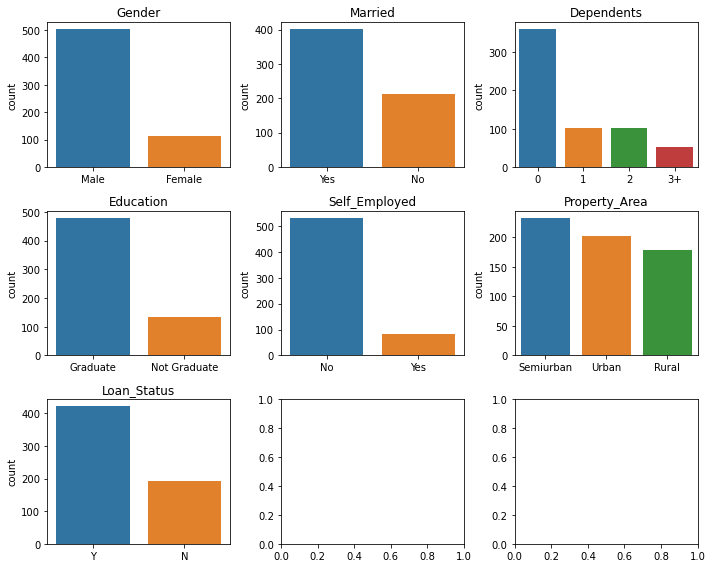

In [28]:
fig, ax = plt.subplots(3,3, figsize=(10,8))
ax = np.ravel(ax)
for i,attr in enumerate(obj_attr):
    sns.countplot(data = df_loans, x = df_loans[attr].values, ax = ax[i], order = df_loans[attr].value_counts().index)
    ax[i].set_title(attr)
plt.tight_layout()

There appears to be a mild imbalance in the dataset. Given that the degree of imbalance is not too high (around 66% belonging to Y and 33% belonging to N), it may not be necessary to take steps to deal with the data imbalance.
In the case of gender, most of the applicants appear to be male. Additionally, most of the applicants are married and have no dependents. Most of the applicants also appear to have a graduate level of education and are not self employed. Finally, the distribution of the property area seems to be well distributed among the three sectors.

### Numeric Attributes vs Target Variable

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

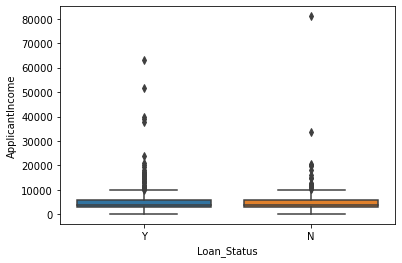

In [29]:
sns.boxplot(x = df_loans['Loan_Status'], y =df_loans['ApplicantIncome'])

The distribution of the ApplicantIncome vs the Loan_Status appear to have similar distribution among those with an approved and declined loan; however, it appear to be that those that there are more outliers in the applicants that have the Loan_Status as approved. This would be consistent with the rationale that higher incomes influence the loan eligibility; However, the only way to improve upon this inference would be to study a larger dataset.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

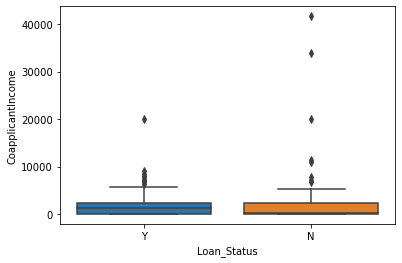

In [30]:
sns.boxplot(x = df_loans['Loan_Status'], y =df_loans['CoapplicantIncome'])

The CoapplicantIncome also present a similar distribution between the approved and denied applicants. But an important aspect is the median value of the approved applicants. This might imply that higher income from the co-applicant might improve the chances of being approved.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

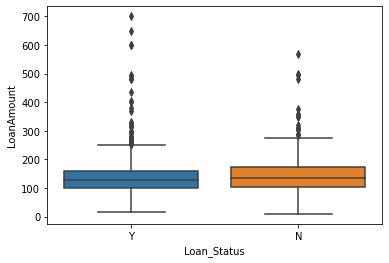

In [31]:
sns.boxplot(x = df_loans['Loan_Status'], y =df_loans['LoanAmount'])

Like the previous attributes, both the LoanAmount of the approved and denied applicants follow a similar distribution. There is no significant difference among both groups with the exception of the outliers, where the approved applicants show significantly higher number of outilers with a high LoanAmount than those that were denied.

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

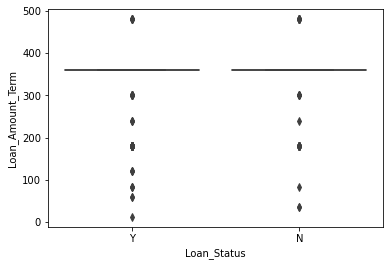

In [32]:
sns.boxplot(x = df_loans['Loan_Status'], y =df_loans['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

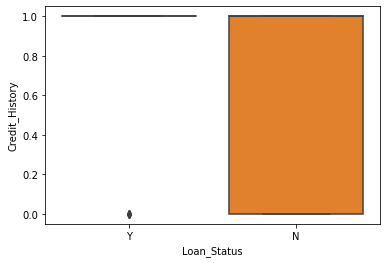

In [33]:
sns.boxplot(x = df_loans['Loan_Status'], y =df_loans['Credit_History'])

From this last plot, the best insight that can be extracted is that applicants with a good credit history are most likely to get approved, since the only instances of being approved with a bad credit history is an outlier.

<AxesSubplot:>

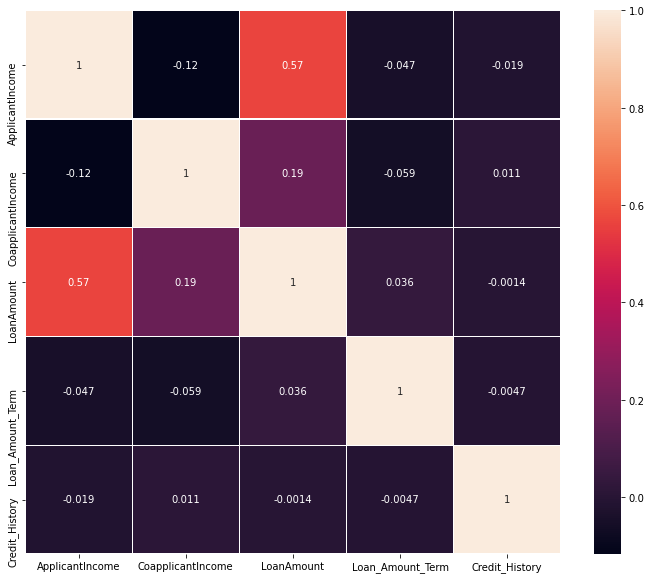

In [34]:
corrm = df_loans.corr()

f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corrm, ax = ax, linewidth = 0.25, annot = True )

The correlation matrix show a high correlation between LoanAmount and ApplicantIncome. For the model implementation, the exclusion of one of these variables might help improve performance by avoiding collinearity. Overall, the matrix shows no other strong correlation among the numeric variables.

# Data Preparation

Process to encode the categorical attributes and binary attributes.

In [35]:
binary_attr = df_loans.nunique()[df_loans.nunique() == 2].keys().tolist()
numeric_attr = [col for col in df_loans.select_dtypes(['float64','int64']).columns.tolist() if col not in binary_attr]
cat_attr = [ col for col in df_loans.select_dtypes('object').columns.to_list() if col not in binary_attr + numeric_attr ]

df_loans_labeled = df_loans.copy()

## Binary Encoding

Binary Attributes are assigned 0's and 1's to replace each of their values

In [36]:
label_encode = LabelEncoder()
for i in binary_attr:
    df_loans_labeled[i] = label_encode.fit_transform(df_loans_labeled[i])
    print(i, '\n', np.unique(df_loans_labeled[i].values))

Gender 
 [0 1]
Married 
 [0 1]
Education 
 [0 1]
Self_Employed 
 [0 1]
Credit_History 
 [0 1]
Loan_Status 
 [0 1]


## Categorical into Dummy Variables

To deal with the categorical values that present more than a single value, dummy variables are created to take the form of binary values by adding new features to the dataset.

In [37]:
print(cat_attr)
df_loans_labeled = pd.get_dummies(df_loans_labeled, columns=cat_attr)
print(df_loans_labeled.columns)

['Dependents', 'Property_Area']
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


## Processed Data

In [38]:
df_loans_labeled.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1,1,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1,1,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1,1,1,0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1,1,1,0,0,0,0,0,1


In [39]:
df_loans_labeled.tail()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
609,0,0,0,0,2900,0.0,71.0,360.0,1,1,1,0,0,0,1,0,0
610,1,1,0,0,4106,0.0,40.0,180.0,1,1,0,0,0,1,1,0,0
611,1,1,0,0,8072,240.0,253.0,360.0,1,1,0,1,0,0,0,0,1
612,1,1,0,0,7583,0.0,187.0,360.0,1,1,0,0,1,0,0,0,1
613,0,0,0,1,4583,0.0,133.0,360.0,0,0,1,0,0,0,0,1,0


In [40]:
# New Shape of the data, number of attribute columns increased due to the inclusion of the dummy variables
df_loans_labeled.shape

(614, 17)

In [41]:
from sklearn.feature_selection import chi2

res = chi2(df_loans_labeled.drop(['Loan_Status'],axis = 1), df_loans_labeled['Loan_Status'])
features = pd.DataFrame({
    'features': df_loans_labeled.drop(['Loan_Status'],axis = 1).columns,
    'chi2': res[0],
    'p-value': res[1]
})

In [42]:
features.head()

,features,chi2,p-value
0,Gender,0.036234,8.490324e-01
1,Married,1.782425,1.818518e-01
2,Education,3.540502,5.988732e-02
3,Self_Employed,0.007285,9.319823e-01
4,ApplicantIncome,93.904964,3.310429e-22


The result of the chi-squared test for the categorical attributes allow to reject the null hypothesis that these attributes do not yield valuable information. 

<AxesSubplot:>

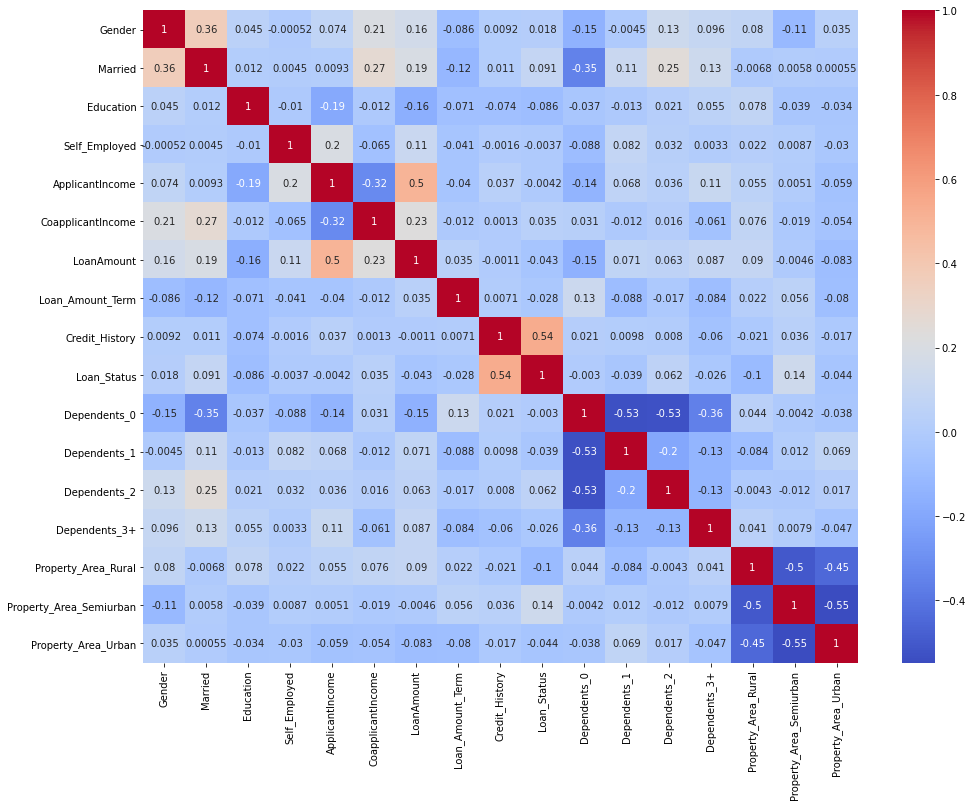

In [43]:
corrm = df_loans_labeled.corr(method='spearman')

f, ax = plt.subplots(figsize = (16,12))
sns.heatmap(corrm, annot=True, cmap='coolwarm')

The second correlation matrix allows to re-evaluate the attributes given the numeric binarization of the categorical attributes. The correlation is performed using Spearman's rank coefficient. The only significant correlation with the target variable that is observed in this matrix is the Credit_History attribute, indicating that a good credit score (1) correlates to the loan being approved.

## Data split

In [44]:
X=df_loans_labeled.drop('Loan_Status', axis=1)
y=df_loans_labeled['Loan_Status']

## Feature Importance

In [45]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
feat = X.columns
importance = {}
# Get 10 values and obtain the mean to determine which are the best features
for n in range(10):
    for i in range(len(model.feature_importances_)):
        if feat[i] not in importance:
            importance[feat[i]] = [model.feature_importances_[i]]
        else:
            importance[feat[i]].append(model.feature_importances_[i])

imp = pd.DataFrame.from_dict(importance)
imp.mean(axis = 0)

Gender                     0.023699
Married                    0.026090
Education                  0.024325
Self_Employed              0.025999
ApplicantIncome            0.185479
CoapplicantIncome          0.112618
LoanAmount                 0.177369
Loan_Amount_Term           0.048381
Credit_History             0.275310
Dependents_0               0.019022
Dependents_1               0.015721
Dependents_2               0.012212
Dependents_3+              0.012084
Property_Area_Rural        0.015746
Property_Area_Semiurban    0.015090
Property_Area_Urban        0.010855
dtype: float64

According to what is observed in the feature importance algorithm of Extra Trees Classifiers, the best features are the Credit_History, LoanAmount, ApplicantIncome and CoapplicantIncome.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
pd.DataFrame({"Train Row Count":[X_train.shape[0],y_train.shape[0]],
              "Test Row Count":[X_test.shape[0],y_test.shape[0]]},
             index=["X (Predictors)","Y (Target)"])

,Train Row Count,Test Row Count
X (Predictors),460,154
Y (Target),460,154


## Data Standarization

In [47]:
# Classifier (Loan Approval)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models Regression Analysis

In [48]:
# Predictors drop Loan amount (target for regression model) and Loan Status, since ideally it would be for new customers.
predictor = df_loans_labeled.drop(['LoanAmount', 'Loan_Status'],axis = 1)
labels = df_loans_labeled['LoanAmount'].values

predictor = sm.add_constant(predictor)

model = sm.OLS(labels, predictor)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     32.98
Date:                Wed, 04 May 2022   Prob (F-statistic):           7.28e-62
Time:                        17:52:41   Log-Likelihood:                -3426.0
No. Observations:                 614   AIC:                             6880.
Df Residuals:                     600   BIC:                             6942.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Given the obtained $R^2$ of 0.417 and the adjusted $R^2$ of 0.404, a weak model could be implemented with the complete set of data provided by the company to predict the Loan Amount. In the report, it can be observed that most of the variables return p-values higher than the confidence level of 0.05. Now, according to the correlation matrix previously presented, the ApplicantIncome and CoapplicantIncome variables present the highest correlations with Loan_Amount, a high correlation of 0.5 for the ApplicantIncome variable, and mild correlation of 0.23 for the CoapplicantIncome variable. A second Regression model is set up to test if these variables could be useful for a regression analysis model.

In [49]:
predictor = df_loans_labeled.drop(['LoanAmount', 'Loan_Status', 'Gender', 'Self_Employed',
                                   'Credit_History', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
                                  'Property_Area_Urban', 'Property_Area_Semiurban', 'Property_Area_Rural',
                                   'Married', 'Loan_Amount_Term', 'Education'],axis = 1)
labels = df_loans_labeled['LoanAmount'].values

predictor = sm.add_constant(predictor)

model = sm.OLS(labels, predictor)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 04 May 2022   Prob (F-statistic):           2.84e-65
Time:                        17:52:41   Log-Likelihood:                -3442.2
No. Observations:                 614   AIC:                             6890.
Df Residuals:                     611   BIC:                             6904.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                90.1600      3.97

The resulting $R^2$ of 0.385 and the adjusted $R^2$ of 0.383 of the Regression model indicate a weak predictive power. Given these results, the inclusion of a regression model to predict loan amount would **not be recommended**. _*If the company decides to adopt a regression model*_ similar to those presented in this work to predict the loan amount, it should be noted that the prediction done by the model should be taken only as a possible amount the applicant might request and provide initial insight for the applicants case; However, in no way it reflects the actual amount that would be requested by the applicants, a no action to deny or approve the loan prior to the applicant's request should be done. 


Further study would be required to provide a definitive decision if a regression model could be included into the process, to determine if more data would be required or if a more rigourous search of variables could provide better results.

# Classifier Models

In [50]:
y_train = y_train.values.ravel()

In [51]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test,y_pred_dtc)
dtc_recall = recall_score(y_test,y_pred_dtc)
dtc_prec = precision_score(y_test,y_pred_dtc)
dtc_f1 = f1_score(y_test,y_pred_dtc)
# print(classification_report(y_test, y_pred_dtc))

In [52]:
# SVM
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
y_pred_svm = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test,y_pred_svm)
svm_recall = recall_score(y_test,y_pred_svm)
svm_prec = precision_score(y_test,y_pred_svm)
svm_f1 = f1_score(y_test,y_pred_svm)
# print(classification_report(y_test, y_pred_svm))

In [53]:
# Logistic Regression
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred_logr = logr.predict(X_test)
logr_acc = accuracy_score(y_test,y_pred_logr)
logr_recall = recall_score(y_test,y_pred_logr)
logr_prec = precision_score(y_test,y_pred_logr)
logr_f1 = f1_score(y_test,y_pred_logr)
# print(classification_report(y_test, y_pred_logr))

In [54]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test,y_pred_gnb)
gnb_recall = recall_score(y_test,y_pred_gnb)
gnb_prec = precision_score(y_test,y_pred_gnb)
gnb_f1 = f1_score(y_test,y_pred_gnb)
# print(classification_report(y_test, y_pred_gnb))

In [55]:
# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)
rfc_recall = recall_score(y_test,y_pred_rfc)
rfc_prec = precision_score(y_test,y_pred_rfc)
rfc_f1 = f1_score(y_test,y_pred_rfc)
# print(classification_report(y_test, y_pred_rfc))

In [56]:
# Xgboost Classifier
xgboast = xgb.XGBClassifier(eval_metric = 'logloss')
xgboast.fit(X_train, y_train)
xgboast_acc = xgboast.score(X_test,y_test)
xgb_pred = xgboast.predict(X_test)
xgb_recall = recall_score(y_test,xgb_pred)
xgb_prec = precision_score(y_test,xgb_pred)
xgb_f1 = f1_score(y_test,xgb_pred)
# print(classification_report(y_test, xgb_pred))

In [57]:
# GBM
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
gbm_acc = accuracy_score(y_test,y_pred_gbm)
gbm_recall = recall_score(y_test,y_pred_gbm)
gbm_prec = precision_score(y_test,y_pred_gbm)
gbm_f1 = f1_score(y_test,y_pred_gbm)

# Evaluation

In [58]:
pd.DataFrame({"Algorithms":["Decision Tree","SVM","Logistic Regression","Naive Bayes","Random Forest","Xgboost Classifier", "GBM"],
              "Scores":[dtc_acc,svm_acc,logr_acc,gnb_acc,rfc_acc,xgboast_acc,gbm_acc],
              "Recall":[dtc_recall,svm_recall,logr_recall,gnb_recall,rfc_recall,xgb_recall,gbm_recall],
              "Precision":[dtc_prec,svm_prec,logr_prec,gnb_prec,rfc_prec,xgb_prec,gbm_prec],
              "F1 Score":[dtc_f1,svm_f1,logr_f1,gnb_f1,rfc_f1,xgb_f1,gbm_f1]})


,Algorithms,Scores,Recall,Precision,F1 Score
0,Decision Tree,0.720779,0.771429,0.810000,0.790244
1,SVM,0.831169,1.000000,0.801527,0.889831
2,Logistic Regression,0.824675,0.980952,0.804688,0.884120
3,Naive Bayes,0.805195,0.952381,0.800000,0.869565
4,Random Forest,0.824675,0.980952,0.804688,0.884120
5,Xgboost Classifier,0.785714,0.904762,0.805085,0.852018
6,GBM,0.792208,0.914286,0.806723,0.857143


Overall, all the models performed well. The best results are observed with the SVM and Logistic Regression Classifiers with an accuracy of 80.51%, followed by Naive Bayes with 

When comparing all the models, Naive Bayes appear to be the best performing model with 75.9%, followed by Logistic Regression 75.3%, Random Forest 74.02% and GBM 74.02%.

## Confusion Matrix

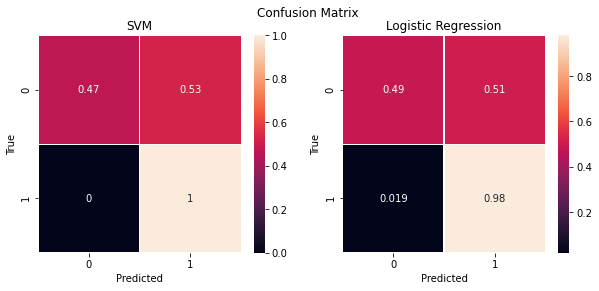

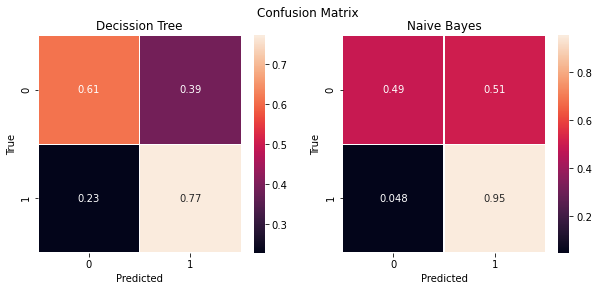

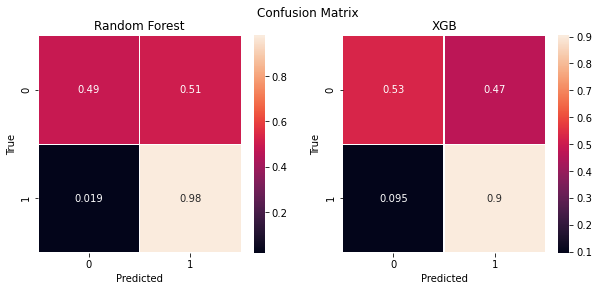

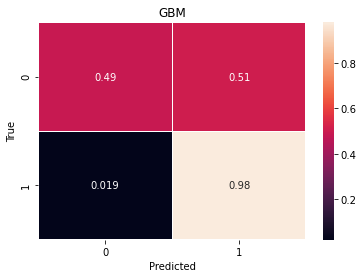

In [59]:
svm_corr = confusion_matrix(y_test, y_pred_svm, normalize='true')
lr_corr = confusion_matrix(y_test, y_pred_logr, normalize='true')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Confusion Matrix')

sns.heatmap(svm_corr, annot=True, linewidths=.1, ax=ax[0])
ax[0].set_title('SVM')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(lr_corr, annot=True, linewidths=.1, ax=ax[1])
ax[1].set_title('Logistic Regression')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

# fig.savefig("correlation_.png", dpi=600)

dt_corr = confusion_matrix(y_test, y_pred_dtc, normalize='true')
nb_corr = confusion_matrix(y_test, y_pred_gnb, normalize='true')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Confusion Matrix')

sns.heatmap(dt_corr, annot=True, linewidths=.1, ax=ax[0])
ax[0].set_title('Decission Tree')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(nb_corr, annot=True, linewidths=.1, ax=ax[1])
ax[1].set_title('Naive Bayes')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

# fig.savefig("correlation_.png", dpi=600)

rf_corr = confusion_matrix(y_test, y_pred_rfc, normalize='true')
xgb_corr = confusion_matrix(y_test, xgb_pred, normalize='true')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Confusion Matrix')

sns.heatmap(rf_corr, annot=True, linewidths=.1, ax=ax[0])
ax[0].set_title('Random Forest')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(xgb_corr, annot=True, linewidths=.1, ax=ax[1])
ax[1].set_title('XGB')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')

plt.show()

gbm_corr = confusion_matrix(y_test, y_pred_gbm, normalize='true')

sns.heatmap(rf_corr, annot=True, linewidths=.1)
plt.title('GBM')
plt.ylabel('True')
plt.xlabel('Predicted')

plt.show()

The confusion matrix from the models shown that all of the models have a high true positive ratio, with the XGB being having the lowest. However, it can also be observed that there is a high False positive ratio, were the entries that should have been false were predicted as true. In this case, it might be better to have a higher false negative ratio, since comunicating to the applicants that they were not approved and upon review approve their loan might be better business practing than approving the loan and then denying it.

## Cross Validation

In [60]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('xgb', XGBClassifier(eval_metric = 'logloss')))
models.append(('GBM', GradientBoostingClassifier()))


In [61]:
# evaluate each model in turning kfold results
from sklearn.model_selection import cross_validate



predictors = X
target = y
results_boxplot = []
boxplot_auc = []
names = []
results_mean = []
results_std = []
results_auc_mean = []
results_auc_std = []
p,t = predictors.values, target.values.ravel()
for name, model in models:
    cv_results = cross_validate(model, p,t, cv=10,
                               scoring=('accuracy','roc_auc'))
    results_boxplot.append(cv_results['test_accuracy'])
    results_mean.append(cv_results['test_accuracy'].mean())
    results_std.append(cv_results['test_accuracy'].std())
    boxplot_auc.append(cv_results['test_roc_auc'])
    results_auc_mean.append(cv_results['test_roc_auc'].mean())
    results_auc_std.append(cv_results['test_roc_auc'].std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "Accuracy Mean":results_mean,
                                "Accuracy STD":results_std,
                                "AUC(ROC) Mean": results_auc_mean,
                                "AUC(ROC) STD": results_auc_std})



,Algorithm,Accuracy Mean,Accuracy STD,AUC(ROC) Mean,AUC(ROC) STD
0,LR,0.803067,0.031970,0.763735,0.080373
1,DT,0.710286,0.055495,0.669313,0.066213
2,RFC,0.786859,0.047555,0.757532,0.067524
3,NB,0.786779,0.038003,0.742059,0.047567
4,SVM,0.687308,0.005314,0.523772,0.102345
5,xgb,0.757403,0.057971,0.739367,0.057152
6,GBM,0.785219,0.044288,0.724147,0.084287


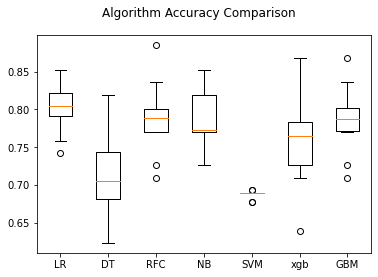

In [62]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.show()

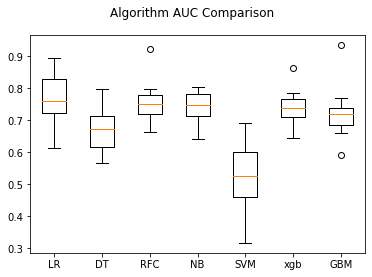

In [63]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(boxplot_auc)
ax.set_xticklabels(names)
plt.show()

Consistent with the first implementation, overall the algorithms perform rather well. The worst results are observed with the SVM, with consistent values around 70%, along with Decision Trees classifiers, with a wide distribution of the results, but with a median lower than 70%. The Random Forest classifier presents better resukts, with a median accuracy of approx, 78%, a max of 85% and a minimum of approx 72%. Similar results are observed with the Naive Bayes and GBM classifiers, with a median value around 77%. The XGB classifier provided the highers max value, with a score higer than 85%, however the median, first and third quartile with values lower than 80%. The best results were obtained through the Logistic Regression classifier, with the median and third quartile being higher than 80% and the max score reaching 85%. Given this results, a Logistic Regression model might be the best modeling technique to predict the loan approaval.

## Hyper-parameter tuning Logistic Regression

In [64]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'penalty': ['l1', 'l2',  'elasticnet']}

grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 0)

grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [65]:
print('best parameter after tuning: ', grid.best_params_)
print('Model with Hyper-parameter tuning: ', grid.best_estimator_)

best parameter after tuning:  {'C': 1, 'penalty': 'l2'}
Model with Hyper-parameter tuning:  LogisticRegression(C=1)


In [66]:
grid_predictions = grid.predict(X_test)

In [67]:
accuracy_score(y_test,grid_predictions)

0.8246753246753247

### Random Forest Hyper-Parameter Tuning

In [68]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 0)

grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [69]:
print('best parameter after tuning: ', grid.best_params_)
print('Model with Hyper-parameter tuning: ', grid.best_estimator_)

best parameter after tuning:  {'criterion': 'gini', 'max_depth': 4}
Model with Hyper-parameter tuning:  DecisionTreeClassifier(max_depth=4)


In [70]:
grid_predictions = grid.predict(X_test)
accuracy_score(y_test,grid_predictions)

0.7987012987012987

### Hyper-parameter tuning SVM

In [71]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [72]:
print('best parameter after tuning: ', grid.best_params_)
print('Model with Hyper-parameter tuning: ', grid.best_estimator_)

best parameter after tuning:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Model with Hyper-parameter tuning:  SVC(C=10, gamma=0.001)


In [73]:
grid_predictions = grid.predict(X_test)
accuracy_score(y_test,grid_predictions)

0.8246753246753247

### Hyper-parameter tuning Random Forest

In [74]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
 
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 0)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [75]:
print('best parameter after tuning: ', grid.best_params_)
print('Model with Hyper-parameter tuning: ', grid.best_estimator_)

best parameter after tuning:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
Model with Hyper-parameter tuning:  RandomForestClassifier(max_depth=4, n_estimators=500)


In [76]:
grid_predictions = grid.predict(X_test)
accuracy_score(y_test,grid_predictions)

0.8246753246753247

### Hyper-parameter tuning XGB

In [77]:
# defining parameter range
param_grid = { 
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.001],
    'max_depth' : [4,6,8],
    'objective':['binary:logistic']}
 
grid = GridSearchCV(XGBClassifier(eval_metric = 'logloss'), param_grid, refit = True, verbose = 0)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     

In [78]:
print('best parameter after tuning: ', grid.best_params_)
print('Model with Hyper-parameter tuning: ', grid.best_estimator_)

best parameter after tuning:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'binary:logistic'}
Model with Hyper-parameter tuning:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [79]:
grid_predictions = grid.predict(X_test)
accuracy_score(y_test,grid_predictions)

0.8246753246753247

### Hyper-parameter tuning GBM

In [80]:
param_grid = { 
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.001],
    'max_depth' : [4,6,8]}
 
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 0)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.001],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 500, 1000]})

In [81]:
print('best parameter after tuning: ', grid.best_params_)
print('Model with Hyper-parameter tuning: ', grid.best_estimator_)

best parameter after tuning:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Model with Hyper-parameter tuning:  GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200)


In [82]:
grid_predictions = grid.predict(X_test)
accuracy_score(y_test,grid_predictions)

0.8181818181818182

# Deployment

This section considers functions that prepares the data for prediction from the predict.csv file according to the steps taken with the data for the model implementation.

In [83]:
# Load data
df_hist = pd.read_csv('loan.csv')
df_predict = pd.read_csv('predict.csv')

In [84]:
def value_imputation(df):
    df = df.drop(['Loan_ID'],axis = 1)
    df['Gender'].fillna('Male',inplace = True)
    df['Married'].fillna('Yes',inplace = True)
    df['Dependents'].fillna('0',inplace = True)
    df['Self_Employed'].fillna('No',inplace = True)
    df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace = True)
    df['Credit_History'].fillna(1.0,inplace = True)
    
    return df

def df_check(df):
    print('Total missing values: {}'.format(df.isnull().sum().sum()))
    df.info()
    

def encode_attributes(df):
    binary = df.nunique()[df.nunique() == 2].keys().tolist()
    numeric = [col for col in df.select_dtypes(['float64','int64']).columns.tolist() if col not in binary]
    cat = [ col for col in df.select_dtypes('object').columns.to_list() if col not in binary + numeric]

    df_encoded = df.copy()
    
    # Binary encode
    label_encode = LabelEncoder()
    for i in binary:
        df_encoded[i] = label_encode.fit_transform(df_encoded[i])
        print(i, '\n', np.unique(df_encoded[i].values))
    
    #Dummy encode
    df_encoded = pd.get_dummies(df_encoded, columns=cat)
    
    print('New DataFrame shape: {}'.format(df_encoded.shape))
    df_encoded.info()
    return df_encoded

In [85]:
df_check(df_predict)
df_check(df_hist)

Total missing values: 84
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
Total missing values: 149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #  

In [86]:
new_df = value_imputation(df_predict)
df_check(new_df)

Total missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [87]:
encoded_df = encode_attributes(new_df)

Gender 
 [0 1]
Married 
 [0 1]
Education 
 [0 1]
Self_Employed 
 [0 1]
Credit_History 
 [0 1]
New DataFrame shape: (367, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   367 non-null    int32  
 1   Married                  367 non-null    int32  
 2   Education                367 non-null    int32  
 3   Self_Employed            367 non-null    int32  
 4   ApplicantIncome          367 non-null    int64  
 5   CoapplicantIncome        367 non-null    int64  
 6   LoanAmount               367 non-null    float64
 7   Loan_Amount_Term         367 non-null    float64
 8   Credit_History           367 non-null    int64  
 9   Dependents_0             367 non-null    uint8  
 10  Dependents_1             367 non-null    uint8  
 11  Dependents_2             367 non-null    uint8  
 12  Dependent

In [88]:
def predict_loan_approval(df,df_hist):
    
    hist_df = value_imputation(df_hist)
    encoded_hist_df = encode_attributes(hist_df)
    
    logr = LogisticRegression(C = 0.1)
    logr.fit(encoded_hist_df.drop(['Loan_Status'],axis = 1),encoded_hist_df['Loan_Status'])
    new_df = value_imputation(df)
    encoded_df = encode_attributes(new_df)
    pred_new = logr.predict(encoded_df)
    values, counts = np.unique(pred_new, return_counts=True)
    print('Number Denied loans: {}\nNumber Approved loans: {}'.format(counts[0],counts[1]))
    
    id_loan = df['Loan_ID'].values
    loan_app = {'Loan_ID':id_loan,
               'Loan_Status':pred_new}
    return pd.DataFrame.from_dict(loan_app)

predict_loan_approval(df_predict,df_hist)

Gender 
 [0 1]
Married 
 [0 1]
Education 
 [0 1]
Self_Employed 
 [0 1]
Credit_History 
 [0 1]
Loan_Status 
 [0 1]
New DataFrame shape: (614, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int32  
 1   Married                  614 non-null    int32  
 2   Education                614 non-null    int32  
 3   Self_Employed            614 non-null    int32  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    int64  
 9   Loan_Status              614 non-null    int32  
 10  Dependents_0             614 non-null    uint8  
 11  Dependents_1             614 non-null    ui

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1
